In [133]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set()

In [134]:
df = pd.read_csv('./Train.csv')
data = df.copy()

In [135]:
data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [136]:
data.describe(include='all')

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451,29451.000000,29451.000000,29451.000000,29451,2.945100e+04,29451.000000,29451.000000,29451,29451.000000,29451.000000,29451.000000
unique,3,NaN,NaN,NaN,2,NaN,NaN,NaN,6899,NaN,NaN,NaN
top,Dealer,NaN,NaN,NaN,BHK,NaN,NaN,NaN,"Zirakpur,Chandigarh",NaN,NaN,NaN
freq,18291,NaN,NaN,NaN,29427,NaN,NaN,NaN,509,NaN,NaN,NaN
mean,NaN,0.179756,0.317918,2.392279,NaN,1.980217e+04,0.820244,0.929578,NaN,21.300255,76.837695,142.898746
std,NaN,0.383991,0.465675,0.879091,NaN,1.901335e+06,0.383991,0.255861,NaN,6.205306,10.557747,656.880713
min,NaN,0.000000,0.000000,1.000000,NaN,3.000000e+00,0.000000,0.000000,NaN,-37.713008,-121.761248,0.250000
25%,NaN,0.000000,0.000000,2.000000,NaN,9.000211e+02,1.000000,1.000000,NaN,18.452663,73.798100,38.000000
50%,NaN,0.000000,0.000000,2.000000,NaN,1.175057e+03,1.000000,1.000000,NaN,20.750000,77.324137,62.000000
75%,NaN,0.000000,1.000000,3.000000,NaN,1.550688e+03,1.000000,1.000000,NaN,26.900926,77.828740,100.000000


* Chances of outliers in BHK_NO , SQUARE_FT and TARGET(PRICE_IN_LACS)

In [137]:
data[data.duplicated()]

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
1904,Dealer,1,0,3,BHK,1209.628644,0,1,"Salt Lake,Kolkata",22.541110,88.337780,100.0
2351,Dealer,0,0,2,BHK,896.680112,1,1,"Zirakpur,Chandigarh",30.662283,76.822397,28.9
2611,Dealer,0,0,3,BHK,1350.256549,1,1,"Sector 78 Faridabad,Faridabad",28.380160,77.369936,50.0
2618,Dealer,1,0,2,BHK,800.000000,0,1,"Chandapura,Bangalore",12.800090,77.711820,27.0
3211,Owner,0,0,2,BHK,712.105799,1,1,"BataNagar,Kolkata",22.506860,88.223965,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...
29321,Dealer,0,1,1,BHK,649.641577,1,1,"Zirakpur,Chandigarh",30.662283,76.822397,14.5
29345,Dealer,1,1,3,BHK,1563.155686,0,1,"Sector-88 Mohali,Mohali",30.684523,76.691728,74.5
29357,Owner,0,1,3,BHK,1446.201311,1,1,"Sector-70 Noida,Noida",28.596320,77.381430,75.0
29389,Builder,1,0,3,BHK,979.290979,0,0,"Barasat,Kolkata",22.747639,88.600902,27.9


* Total no of duplicated rows = 401
* Remove Them

In [138]:
data = data[~data.duplicated()]

In [139]:
data.shape

(29050, 12)

In [140]:
sns.set(rc={'figure.figsize':(16,16)})

# Categorical Values

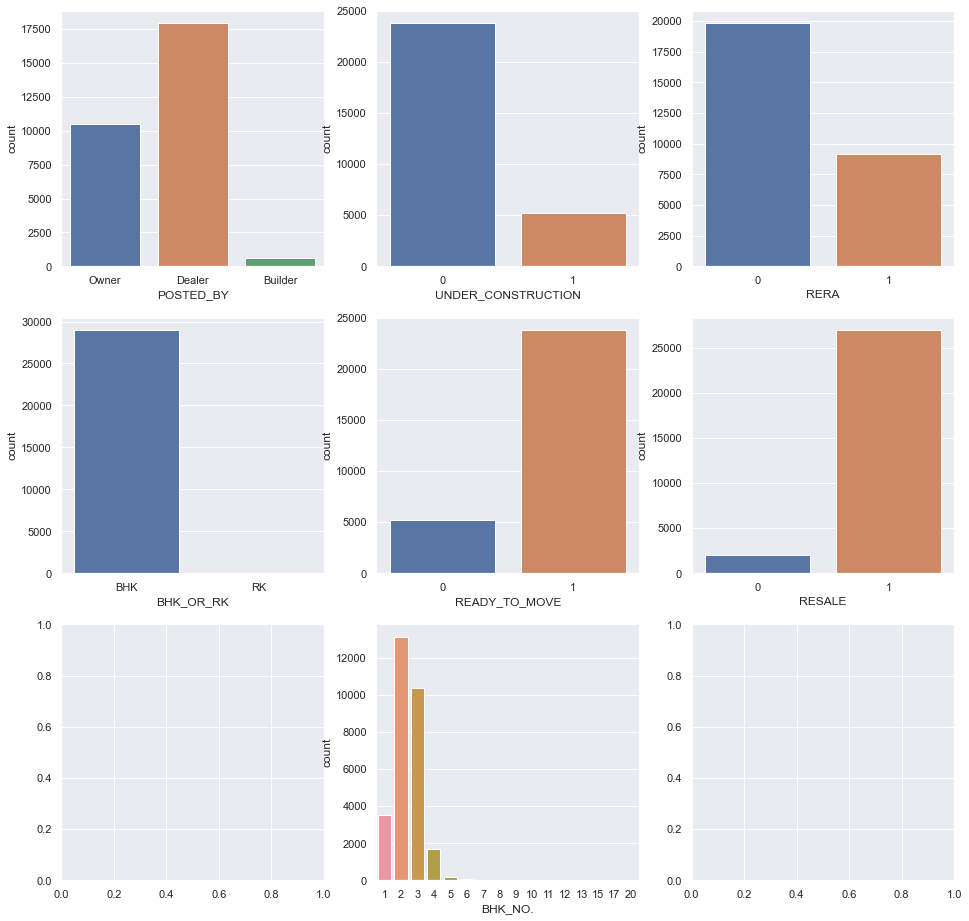

In [141]:
fig,ax = plt.subplots(3,3)

sns.countplot(data=data,x='POSTED_BY',ax=ax[0,0])
sns.countplot(data=data,x='UNDER_CONSTRUCTION',ax=ax[0,1])
sns.countplot(data=data,x='RERA',ax=ax[0,2])
sns.countplot(data=data,x='BHK_OR_RK',ax=ax[1,0])
sns.countplot(data=data,x='READY_TO_MOVE',ax=ax[1,1])
sns.countplot(data=data,x='RESALE',ax=ax[1,2])
sns.countplot(data=data,x='BHK_NO.',ax=ax[2,1])


In [142]:
data['BHK_NO.'].value_counts()

2     13164
3     10365
1      3540
4      1698
5       189
6        52
7        11
8        10
15        4
10        4
20        4
12        3
9         3
13        1
11        1
17        1
Name: BHK_NO., dtype: int64

In [143]:
from scipy.stats import norm

G:\Installed\envs\tensorflowenv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


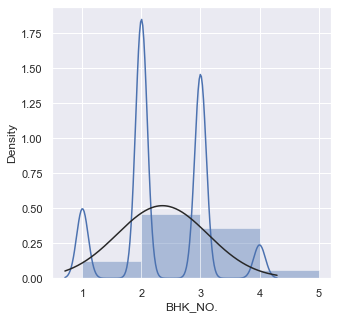

In [144]:
sns.set(rc={'figure.figsize':(5,5)})
sns.distplot(data[data['BHK_NO.']<=4]['BHK_NO.'],bins=[1,2,3,4,5],fit=norm)

In [145]:
data[data['BHK_NO.']>4].shape[0]*100/data.shape[0]

0.9741824440619621

* Percentage of FLAT > 4 BHK = 0.97%
* Select only House with upto 4BHK
* Or Replace them with rare

In [146]:
#data = data[data['BHK_NO.']<=4]
data['BHK_NO.'] = data['BHK_NO.'].map(lambda x: x if x <= 5 else 6)

In [147]:
data['BHK_NO.'].value_counts()

2    13164
3    10365
1     3540
4     1698
5      189
6       94
Name: BHK_NO., dtype: int64

G:\Installed\envs\tensorflowenv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


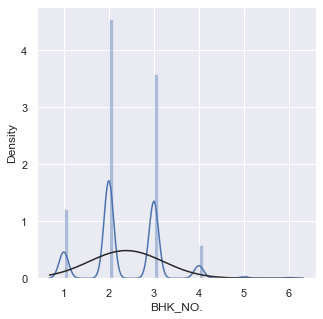

In [148]:
sns.set(rc={'figure.figsize':(5,5)})
sns.distplot(data['BHK_NO.'],fit=norm)

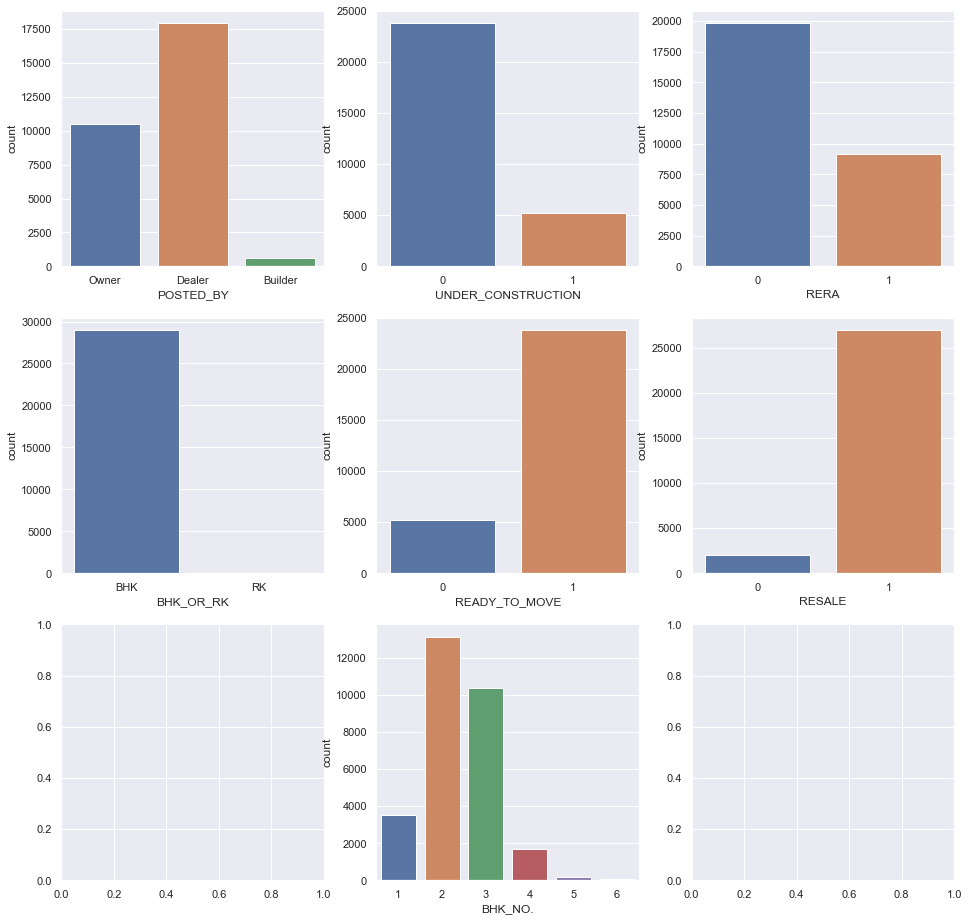

In [149]:
sns.set(rc={'figure.figsize':(16,16)})
fig,ax = plt.subplots(3,3)

sns.countplot(data=data,x='POSTED_BY',ax=ax[0,0])
sns.countplot(data=data,x='UNDER_CONSTRUCTION',ax=ax[0,1])
sns.countplot(data=data,x='RERA',ax=ax[0,2])
sns.countplot(data=data,x='BHK_OR_RK',ax=ax[1,0])
sns.countplot(data=data,x='READY_TO_MOVE',ax=ax[1,1])
sns.countplot(data=data,x='RESALE',ax=ax[1,2])
sns.countplot(data=data,x='BHK_NO.',ax=ax[2,1])


## Numerical Parameter

G:\Installed\envs\tensorflowenv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
G:\Installed\envs\tensorflowenv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
G:\Installed\envs\tensorflowenv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

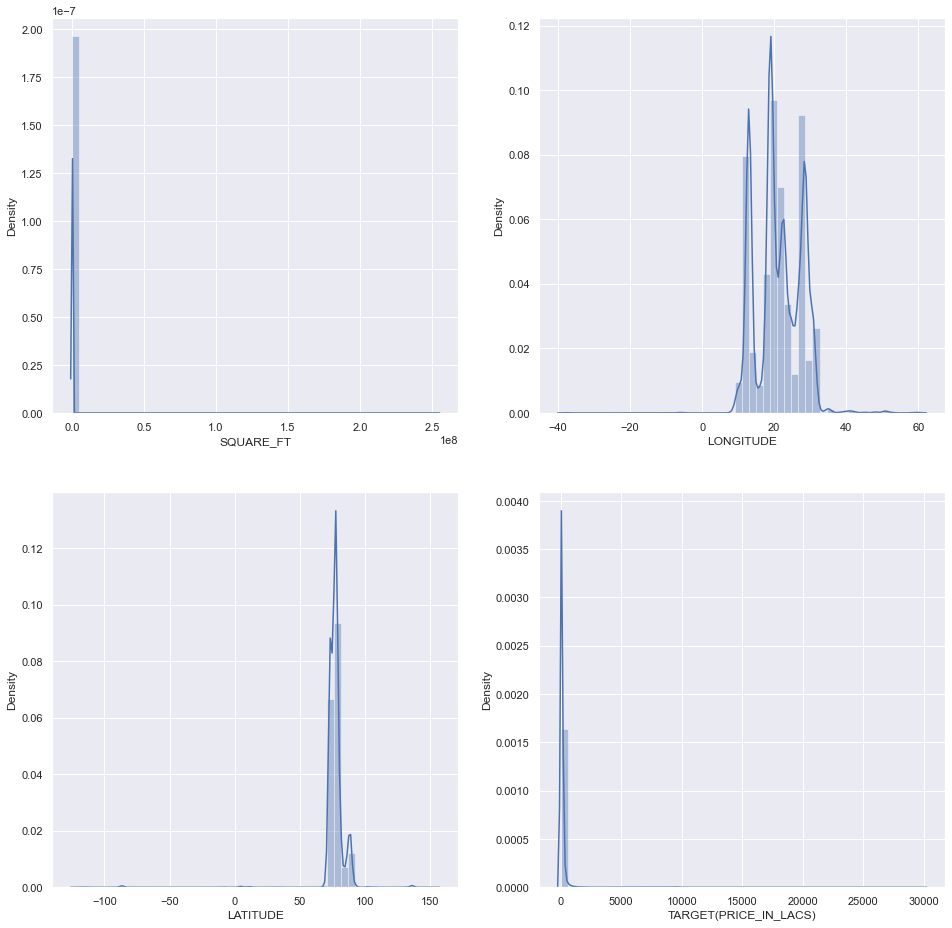

In [150]:
sns.set(rc={'figure.figsize':(16,16)})
fig,ax = plt.subplots(2,2)

sns.distplot(data['SQUARE_FT'],ax=ax[0,0])
sns.distplot(data['LONGITUDE'],ax=ax[0,1])
sns.distplot(data['LATITUDE'],ax=ax[1,0])
sns.distplot(data['TARGET(PRICE_IN_LACS)'],ax=ax[1,1])


G:\Installed\envs\tensorflowenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
G:\Installed\envs\tensorflowenv\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
G:\Installed\envs\tensorflowenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
G:\Installed\envs\tensorflowenv\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  

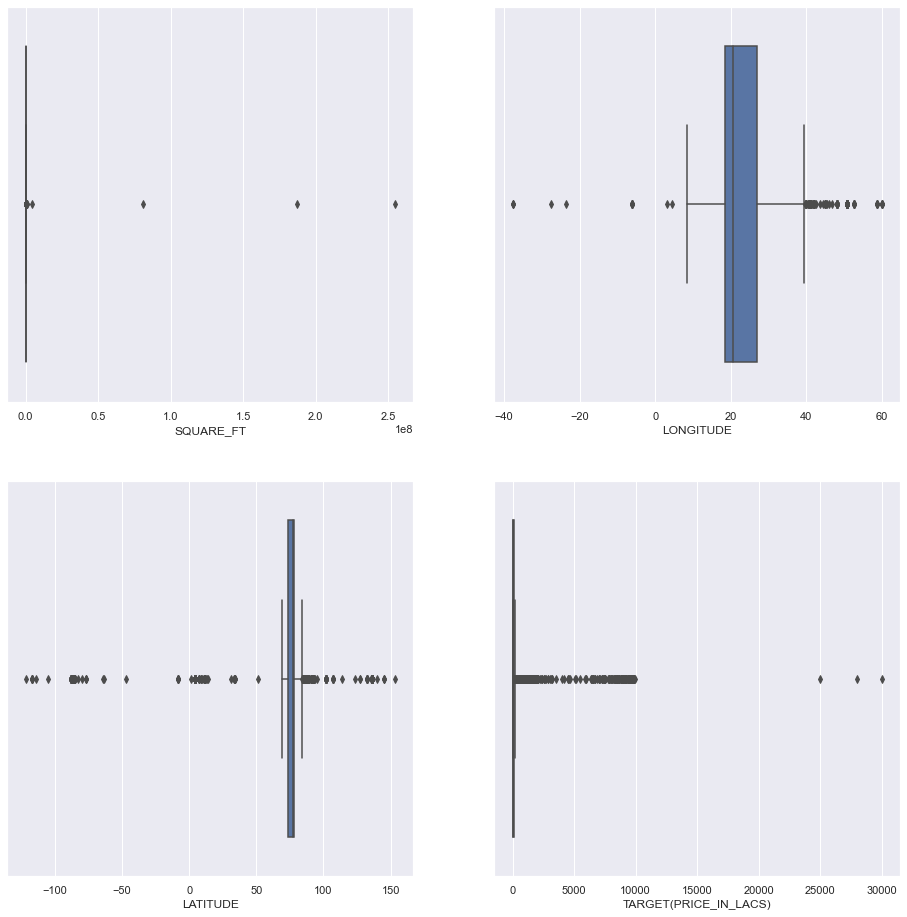

In [19]:
sns.set(rc={'figure.figsize':(16,16)})
fig,ax = plt.subplots(2,2)

sns.boxplot(data['SQUARE_FT'],ax=ax[0,0],orient='v')
sns.boxplot(data['LONGITUDE'],ax=ax[0,1],orient='v')
sns.boxplot(data['LATITUDE'],ax=ax[1,0],orient='v')
sns.boxplot(data['TARGET(PRICE_IN_LACS)'],ax=ax[1,1],orient='v')


### SQUARE_FT

In [151]:
q_1 = data['SQUARE_FT'].quantile(0.25)
q_3 = data['SQUARE_FT'].quantile(0.75)
IQR = q_3-q_1
IQR

650.1691089999999

In [152]:
d1 = data.copy()
print('Percent of Outlier')
d1[(d1['SQUARE_FT'] < (q_1 - 1.5*IQR)) | (d1['SQUARE_FT'] > (q_3 + 1.5*IQR))].shape[0]*100/d1.shape[0]

Percent of Outlier


5.549053356282272

In [33]:
print('Skew')
d1['SQUARE_FT'].skew()

Skew


115.81290137888708

In [34]:
d1[(d1['SQUARE_FT'] >= (q_1 - 1.5*IQR)) & (d1['SQUARE_FT'] <= (q_3 + 1.5*IQR))].groupby(['BHK_NO.'])['SQUARE_FT'].describe()

,count,mean,std,min,25%,50%,75%,max
BHK_NO.,,,,,,,,
1,3518.0,588.865642,156.208120,10.000000,500.000000,600.050581,669.857271,2399.232246
2,13074.0,1023.990916,229.536099,3.000000,882.508803,1036.435630,1170.355724,2500.000000
3,9962.0,1546.323319,339.734178,99.975006,1321.862465,1527.402707,1750.184230,2521.273243
4,823.0,2030.105858,382.174833,45.000191,1801.114511,2134.410153,2319.077799,2525.013414
5,61.0,1806.168156,605.241596,107.000508,1480.000000,2000.000000,2300.405954,2509.410289


* Permforming log transformation

In [35]:
d1['SQUARE_FT'] = np.log(d1['SQUARE_FT'] )


In [36]:
d1['SQUARE_FT'].skew()

2.8620920751795245

In [37]:
q_1 = d1['SQUARE_FT'].quantile(0.25)
q_3 = d1['SQUARE_FT'].quantile(0.75)
IQR = q_3-q_1
print('IQR for Longitude')
IQR


IQR for Longitude


0.5437245432183726

In [38]:
q_min = d1['SQUARE_FT'].quantile(0.01)
q_max = d1['SQUARE_FT'].quantile(0.99)
q_min,q_max

(5.926934303111168, 8.594116603352493)

In [39]:
d2 = d1.copy()
print('Percent of Outlier')
d2[(d2['SQUARE_FT'] < (q_1 - 1.5*IQR)) | (d2['SQUARE_FT'] > (q_3 + 1.5*IQR))].shape[0]*100/d2.shape[0]

Percent of Outlier


3.5249569707401034

In [40]:
d2[(d2['SQUARE_FT'] < (q_1 - 1.5*IQR)) | (d2['SQUARE_FT'] > (q_3 + 1.5*IQR))]

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
40,Dealer,1,1,1,BHK,10.611676,0,0,"Kanjur Marg (East),Lalitpur",24.690280,78.418890,9110.0
48,Builder,1,1,1,BHK,5.710153,0,0,"Taloja,Lalitpur",24.690280,78.418890,26.3
57,Owner,0,1,4,BHK,8.556596,1,1,"Sector-76 Noida,Noida",28.567633,77.383124,110.0
68,Owner,0,0,2,BHK,8.517193,1,1,"Malviya Nagar,Jaipur",26.850391,75.814198,85.0
130,Dealer,0,1,4,BHK,8.497186,1,1,"Kharadi,Pune",18.543800,73.943800,240.0
...,...,...,...,...,...,...,...,...,...,...,...,...
29372,Dealer,0,0,3,BHK,9.617772,1,1,"Kanjur Marg (East),Maharashtra",18.960000,72.820000,280.0
29396,Dealer,0,0,5,BHK,8.313365,1,1,"Manpada,Lalitpur",24.690280,78.418890,920.0
29406,Dealer,1,0,1,BHK,5.704123,0,1,"Wadala East,Lalitpur",19.014858,72.866200,91.0
29409,Dealer,0,1,4,BHK,8.594074,1,1,"Vesu,Surat",21.143354,72.770931,400.0


In [80]:
d1[(d1['SQUARE_FT'] < q_min) | (d1['SQUARE_FT'] > q_max)].shape[0]*100/d1.shape[0]

2.0034423407917386

In [43]:
d1 = d2[(d2['SQUARE_FT'] > (q_1 - 1.5*IQR)) & (d2['SQUARE_FT'] < (q_3 + 1.5*IQR))]

G:\Installed\envs\tensorflowenv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
G:\Installed\envs\tensorflowenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
G:\Installed\envs\tensorflowenv\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


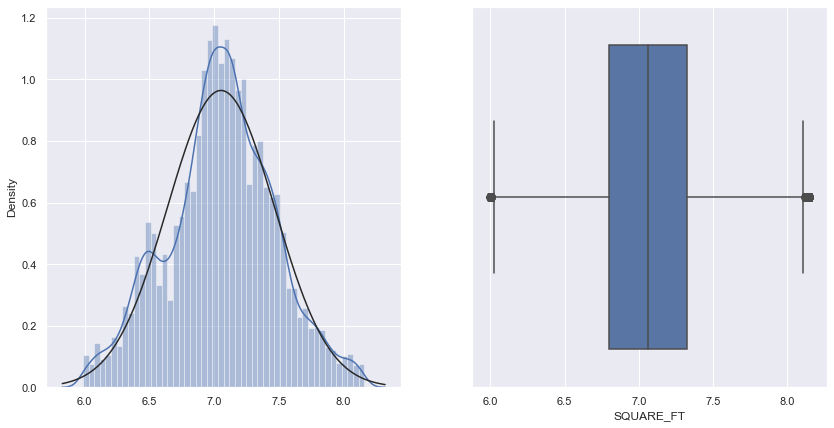

In [44]:
#sns.set(rc={'figure.figsize':(12,7)})
fig,ax = plt.subplots(1,2,figsize=(14,7))
sns.distplot(d1[['SQUARE_FT']],fit=norm,ax=ax[0])
sns.boxplot(d1['SQUARE_FT'],orient='v',ax=ax[1])

### LONGITUDE

In [46]:
q_1 = d1['LONGITUDE'].quantile(0.25)
q_3 = d1['LONGITUDE'].quantile(0.75)
IQR = q_3-q_1
print('IQR for Longitude')
IQR


IQR for Longitude


8.437413

In [47]:
d2 = d1.copy()
print('Percent of Outlier')
d2[(d2['LONGITUDE'] < (q_1 - 1.5*IQR)) | (d2['LONGITUDE'] > (q_3 + 1.5*IQR))].shape[0]*100/d2.shape[0]

Percent of Outlier


0.5031042603296939

* We can remove it

In [48]:
print('Skew')
d2['LONGITUDE'].skew()

Skew


0.18632481700601997

In [49]:
q_min = d2['LONGITUDE'].quantile(0.01)
q_max = d2['LONGITUDE'].quantile(0.99)
q_min,q_max

(9.994, 31.292091)

In [50]:
d2 = d2[(d2['LONGITUDE'] >= (q_1 - 1.5*IQR)) & (d2['LONGITUDE'] <= (q_3 + 1.5*IQR))]

G:\Installed\envs\tensorflowenv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
G:\Installed\envs\tensorflowenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
G:\Installed\envs\tensorflowenv\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


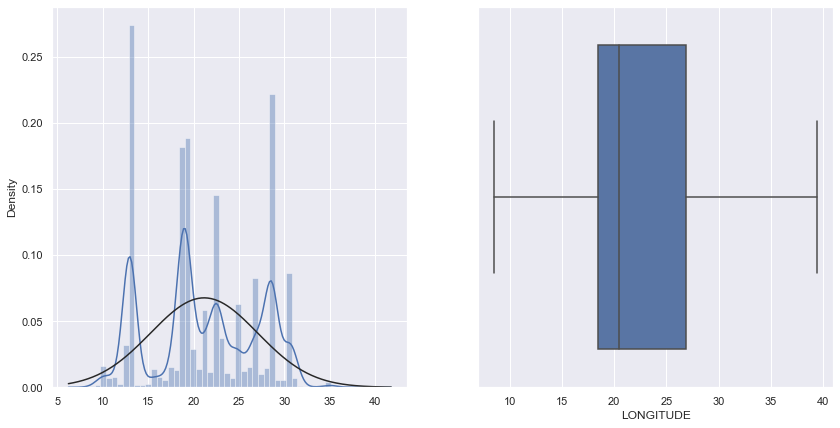

In [51]:
#sns.set(rc={'figure.figsize':(12,7)})
fig,ax = plt.subplots(1,2,figsize=(14,7))
sns.distplot(d2[['LONGITUDE']],fit=norm,ax=ax[0])
sns.boxplot(d2['LONGITUDE'],orient='v',ax=ax[1])

### LATITUDE

In [52]:
q_1 = d2['LATITUDE'].quantile(0.25)
q_3 = d2['LATITUDE'].quantile(0.75)
IQR = q_3-q_1
print('IQR for Longitude')
IQR


IQR for Longitude


4.2059

In [53]:
d3 = d2.copy()
d3 = d3[(d3['LATITUDE'] >= -90) & (d3['LATITUDE'] <= 90)]
print('Percent of Outlier')
d3[(d3['LATITUDE'] < (q_1 - 1.5*IQR)) | (d3['LATITUDE'] > (q_3 + 1.5*IQR))].shape[0]*100/d3.shape[0]

Percent of Outlier


9.20154562854357

* Removing invalid values as, it can be between -90 to +90

In [54]:
d3['LATITUDE'] = np.log(d3['LATITUDE'])

G:\Installed\envs\tensorflowenv\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [55]:
print('Skew')
d3['LATITUDE'] .skew()

Skew


-1.9836859987344877

In [56]:
q_1 = d3['LATITUDE'].quantile(0.25)
q_3 = d3['LATITUDE'].quantile(0.75)
IQR = q_3-q_1
print('IQR for Longitude')
IQR

print('Percent of Outlier')
d3[(d3['LATITUDE'] < (q_1 - 1.5*IQR)) | (d3['LATITUDE'] > (q_3 + 1.5*IQR))].shape[0]*100/d3.shape[0]

IQR for Longitude
Percent of Outlier


9.165432812105015

In [58]:
q_min = d3['LATITUDE'].quantile(0.01)
q_max = d3['LATITUDE'].quantile(0.99)
q_min,q_max

(4.285123104911434, 4.482437420605795)

In [59]:
d3[(d3['LATITUDE'] >= q_min) & (d3['LATITUDE'] <= q_max)].shape[0]*100/d3.shape[0]

97.98490484272868

G:\Installed\envs\tensorflowenv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


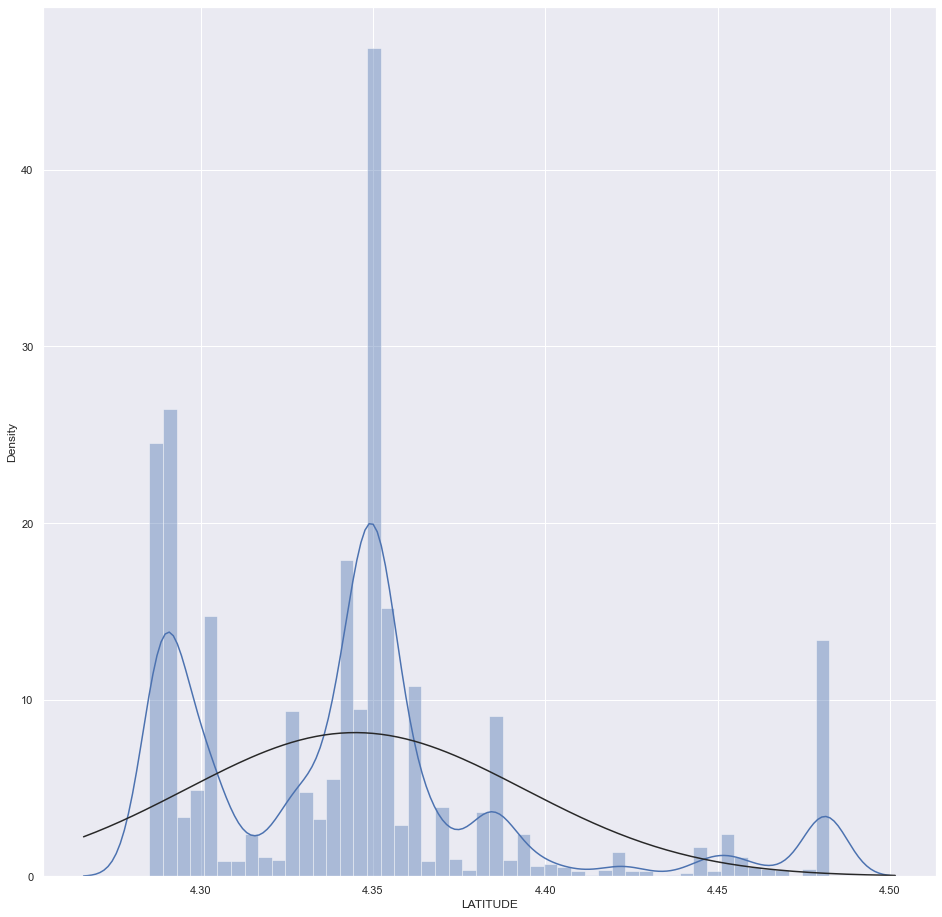

In [60]:
sns.distplot(d3[(d3['LATITUDE'] >= q_min) & (d3['LATITUDE'] < q_max)]['LATITUDE'],fit=norm)

In [61]:
#d3 = d3[(d3['LATITUDE'] >= q_min) & (d3['LATITUDE'] < q_max)]
d3 = d3[(d3['LATITUDE'] >= (q_1 - 1.5*IQR)) & (d3['LATITUDE'] <= (q_3 + 1.5*IQR))]

In [62]:
d3['LATITUDE'].skew()

0.0078110273628060126

### TARGET(PRICE_IN_LACS)

In [63]:
df['TARGET(PRICE_IN_LACS)'].skew()

17.58333227553508

In [64]:
q_1 = d3['TARGET(PRICE_IN_LACS)'].quantile(0.25)
q_3 = d3['TARGET(PRICE_IN_LACS)'].quantile(0.75)
IQR = q_3-q_1
print('IQR for TARGET(PRICE_IN_LACS)')
IQR


IQR for TARGET(PRICE_IN_LACS)


61.0

In [65]:
d4 = d3.copy()
print('Percent of Outlier')
d4[(d4['TARGET(PRICE_IN_LACS)'] < (q_1 - 1.5*IQR)) | (d4['TARGET(PRICE_IN_LACS)'] > (q_3 + 1.5*IQR))].shape[0]*100/d4.shape[0]

Percent of Outlier


9.458276986715456

In [66]:
d4['TARGET(PRICE_IN_LACS)'] = np.log(d4['TARGET(PRICE_IN_LACS)'])
print('Skew')
d4['TARGET(PRICE_IN_LACS)'] .skew()

Skew


0.46024937116679066

In [67]:
q_1 = d4['TARGET(PRICE_IN_LACS)'].quantile(0.25)
q_3 = d4['TARGET(PRICE_IN_LACS)'].quantile(0.75)
IQR = q_3-q_1
print('IQR for Longitude')
IQR


IQR for Longitude


0.9416085398584455

In [68]:
print('Percent of Outlier')
d4[(d4['TARGET(PRICE_IN_LACS)'] < (q_1 - 1.5*IQR)) | (d4['TARGET(PRICE_IN_LACS)'] > (q_3 + 1.5*IQR))].shape[0]*100/d4.shape[0]

Percent of Outlier


2.3387160925940655

In [69]:
q_min = d4['TARGET(PRICE_IN_LACS)'].quantile(0.01)
q_max = d4['TARGET(PRICE_IN_LACS)'].quantile(0.99)
q_min,q_max

(2.5649493574615367, 6.461468176353717)

In [70]:

100-d4[(d4['TARGET(PRICE_IN_LACS)'] >= q_min) & (d4['TARGET(PRICE_IN_LACS)'] <= q_max)].shape[0]*100/d4.shape[0]

1.9489300771617195

G:\Installed\envs\tensorflowenv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


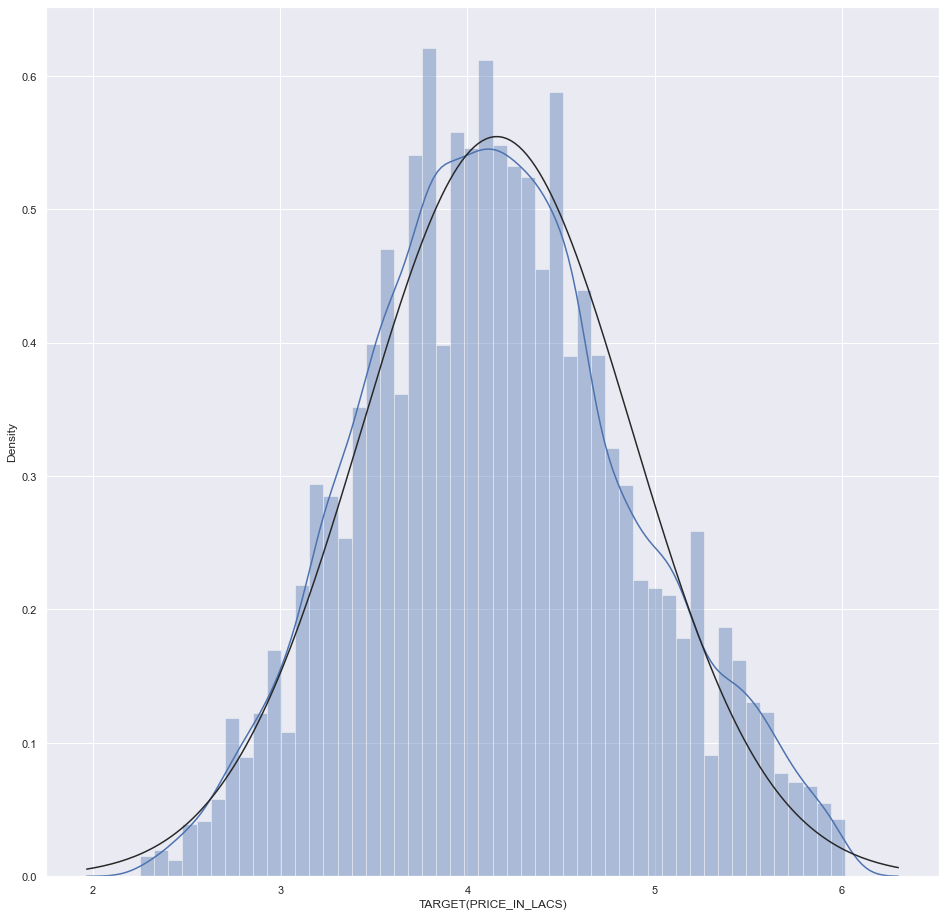

In [71]:
#d4 = d4[(d4['TARGET(PRICE_IN_LACS)'] >= q_min) & (d4['TARGET(PRICE_IN_LACS)'] <= q_max)]
d4 = d4[(d4['TARGET(PRICE_IN_LACS)'] > (q_1 - 1.5*IQR)) & (d4['TARGET(PRICE_IN_LACS)'] < (q_3 + 1.5*IQR))]
sns.distplot(d4['TARGET(PRICE_IN_LACS)'],fit=norm)

In [72]:
d4['TARGET(PRICE_IN_LACS)'].skew()

0.17366261267644725

### Final Results

G:\Installed\envs\tensorflowenv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
G:\Installed\envs\tensorflowenv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
G:\Installed\envs\tensorflowenv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

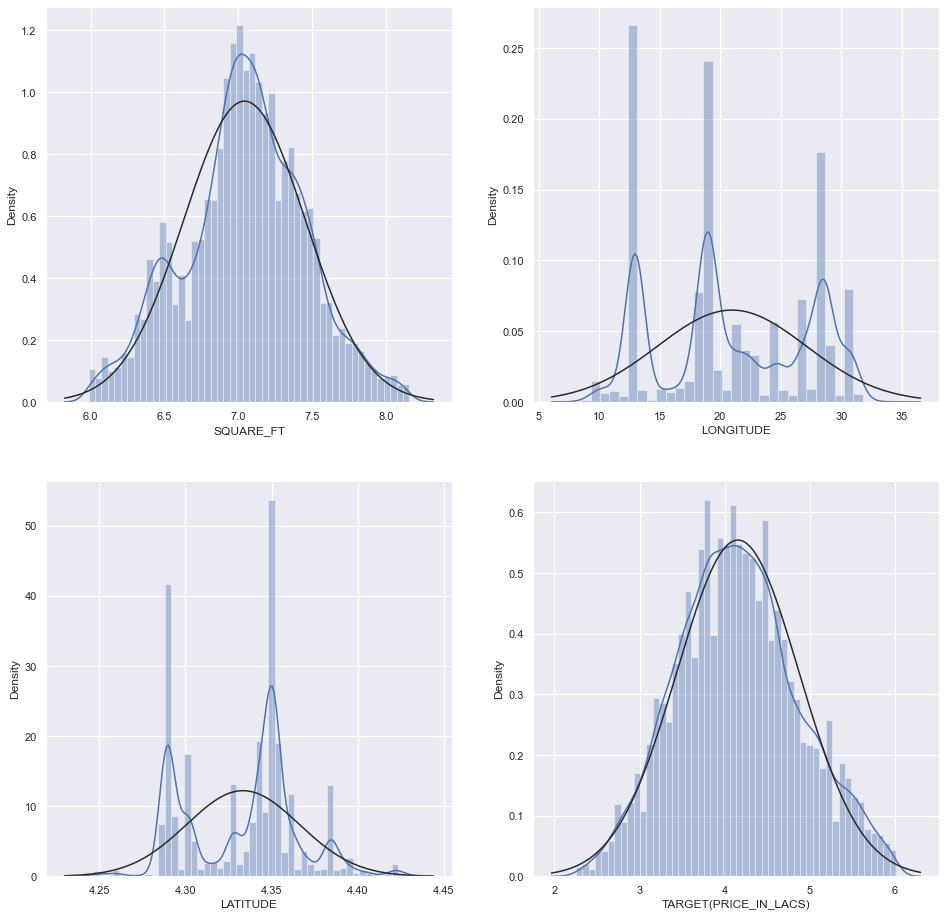

In [79]:
sns.set(rc={'figure.figsize':(16,16)})
fig,ax = plt.subplots(2,2)

sns.distplot(d4['SQUARE_FT'],fit=norm,ax=ax[0,0])
sns.distplot(d4['LONGITUDE'],fit=norm,ax=ax[0,1])
sns.distplot(d4['LATITUDE'],fit=norm,ax=ax[1,0])
sns.distplot(d4['TARGET(PRICE_IN_LACS)'],fit=norm,ax=ax[1,1])


G:\Installed\envs\tensorflowenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
G:\Installed\envs\tensorflowenv\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
G:\Installed\envs\tensorflowenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
G:\Installed\envs\tensorflowenv\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  

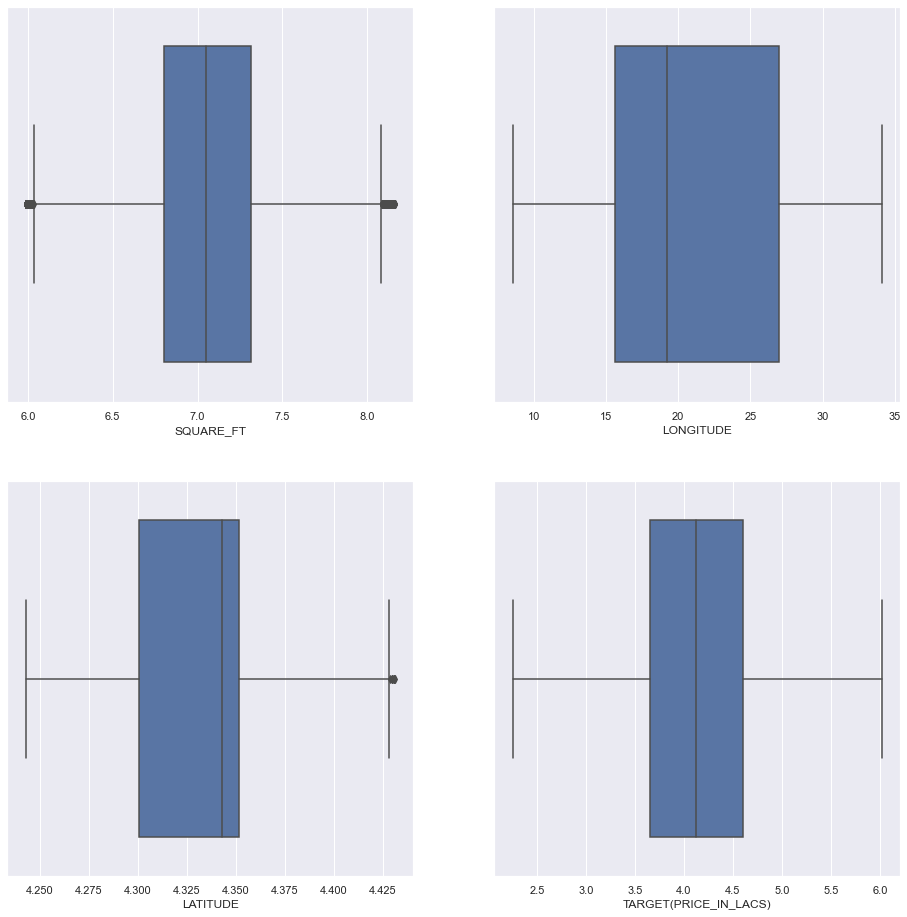

In [81]:
sns.set(rc={'figure.figsize':(16,16)})
fig,ax = plt.subplots(2,2)

sns.boxplot(d4['SQUARE_FT'],ax=ax[0,0],orient='v')
sns.boxplot(d4['LONGITUDE'],ax=ax[0,1],orient='v')
sns.boxplot(d4['LATITUDE'],ax=ax[1,0],orient='v')
sns.boxplot(d4['TARGET(PRICE_IN_LACS)'],ax=ax[1,1],orient='v')


In [82]:
d4.to_csv('Univariate-Train-2.csv',index=False)

In [83]:
d4.shape[0]*100/df.shape[0]

83.37238124342127

## Test File Analysis

* Take log of Sq_ft and Latitude

In [84]:
test  = pd.read_csv('./Test.csv')

In [85]:
test.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000


In [86]:
test.loc[:,['SQUARE_FT','LATITUDE']] = np.log(test[['SQUARE_FT','LATITUDE']])


G:\Installed\envs\tensorflowenv\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


In [87]:
test.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,6.301100,1,1,"Kamrej,Surat",21.262000,4.291113
1,Dealer,1,1,2,BHK,6.684612,0,0,"Panvel,Lalitpur",18.966114,4.292489
2,Dealer,0,0,2,BHK,7.136560,1,1,"New Town,Kolkata",22.592200,4.482832
3,Dealer,0,0,3,BHK,7.244463,1,1,"Kalwar Road,Jaipur",26.988300,4.325253
4,Owner,0,0,1,BHK,6.064896,1,1,"Mai Mandir,Nadiad",22.700000,4.288677


In [88]:
test.to_csv('Univariate-Test.csv')

## Auto EDA

In [21]:
from pandas_profiling import ProfileReport

In [22]:
df = pd.read_csv('./Univariate-Test.csv')

In [23]:
profile = ProfileReport(test)

In [24]:
profile.to_file('./Pandas Profiling/test.html')
profile.to_widgets()

#### Latitude has 0.3 % missing values in Test Data
    * Possible Measures:
    * Take median
    * Take median after clustering on Latitude and Longitude
    * Take value of corresponding state

In [25]:
import sweetviz as sv

In [26]:
train = pd.read_csv('./Univariate-Train.csv')

In [28]:
advert_report = sv.compare([test,"Test Data"],[train,"Train Data"])
advert_report.show_html('./Pandas Profiling/Train_Test_Report.html')


                                   |                         | [  0%]   00:00  -> (? left)
Summarizing dataframe:             |                         | [  0%]   00:00  -> (? left)
Summarizing dataframe:             |█▊                   | [  8%]   00:00  -> (00:01 left)
:POSTED_BY:                        |█▊                   | [  8%]   00:00  -> (00:01 left)
:POSTED_BY:                        |███▌                 | [ 17%]   00:00  -> (00:02 left)
:UNDER_CONSTRUCTION:               |███▌                 | [ 17%]   00:00  -> (00:02 left)
:UNDER_CONSTRUCTION:               |█████▎               | [ 25%]   00:00  -> (00:02 left)
:RERA:                             |█████▎               | [ 25%]   00:00  -> (00:02 left)
:RERA:                             |███████              | [ 33%]   00:01  -> (00:01 left)
:BHK_NO.:                          |███████              | [ 33%]   00:01  -> (00:01 left)G:\Installed\envs\tensorflowenv\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprec

G:\Installed\envs\tensorflowenv\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
G:\Installed\envs\tensorflowenv\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
G:\Installed\envs\tensorflowenv\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with d

Creating Associations graph... DONE!
Report ./Pandas Profiling/Train_Test_Report.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.
